In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
METTON_PER_TON = 0.907185
KG_PER_METTON = 1000

## Analyze PM 2.5 rates 

Note: PJM has ~1400 electricity generators (https://www.pjm.com/~/media/about-pjm/newsroom/fact-sheets/pjm-at-a-glance.ashx) 

### Get 2008/2011/2014 rates and their ratio

In [3]:
plant2008 = pd.read_csv('plant_pm_rates2008.csv', index_col='orispl').sort_index()
plant2011 = pd.read_csv('plant_pm_rates2011.csv', index_col='orispl').sort_index()
plant2014 = pd.read_csv('plant_pm_rates2014.csv', index_col='orispl').sort_index()

In [4]:
print(len(plant2008))
print(len(plant2011))
print(len(plant2014))

789
786
432


In [5]:
df = pd.concat([plant2008['pmrate'], plant2011['pmrate'], plant2014['pmrate']], axis=1)
df.columns = ['pmrate2008', 'pmrate2011', 'pmrate2014']
df['ratio2014-2011'] = (df['pmrate2014'] / df['pmrate2011'])
df['ratio2011-2008'] = (df['pmrate2011'] / df['pmrate2008'])
df['ratio2014-2008'] = (df['pmrate2014'] / df['pmrate2008'])

In [6]:
df['ratio2014-2011'].describe()

count    429.000000
mean       1.473668
std        5.241565
min        0.008394
25%        0.656447
50%        0.972833
75%        1.145010
max       98.302996
Name: ratio2014-2011, dtype: float64

In [7]:
df['ratio2011-2008'].describe()

count    765.000000
mean       2.210158
std        6.828824
min        0.008058
25%        0.652989
50%        0.992927
75%        1.454827
max      131.014436
Name: ratio2011-2008, dtype: float64

In [8]:
df.dropna()

,pmrate2008,pmrate2011,pmrate2014,ratio2014-2011,ratio2011-2008,ratio2014-2008
orispl,,,,,,
8,0.000033,0.000060,4.974176e-05,0.825561,1.809986,1.494253
26,0.000040,0.000091,3.984484e-05,0.438964,2.291440,1.005860
51,0.000107,0.000097,8.245157e-05,0.851192,0.909512,0.774170
59,0.000067,0.000044,1.372868e-05,0.315472,0.652989,0.206000
60,0.000108,0.000038,3.234613e-05,0.848870,0.353869,0.300389
87,0.000029,0.000009,8.555285e-06,0.995791,0.292739,0.291507
108,0.000027,0.000055,5.584967e-05,1.009792,2.064589,2.084806
118,0.000032,0.000026,7.338283e-05,2.777985,0.821027,2.280801
120,0.000033,0.000016,3.896040e-05,2.375380,0.502422,1.193444


### Isolate to plants in PJM 

In [9]:
plant_geo = pd.read_csv('plant_geography.csv', index_col='orispl').sort_index()
plant_geo.index = plant_geo.index.astype(int)

In [10]:
pjm = plant_geo[plant_geo['isorto'] == 'PJM']

In [11]:
len(pjm)

1017

In [12]:
df_pjm = df.reindex(pjm.index)
len(df_pjm)

1017

In [13]:
print(len(plant2014.reindex(pjm.index).dropna()))
print(len(plant2011.reindex(pjm.index).dropna()))
print(len(plant2008.reindex(pjm.index).dropna()))

43
145
142


### Stats 

In [14]:
ratios = pd.DataFrame(df_pjm[['ratio2014-2011', 'ratio2011-2008', 'ratio2014-2008']])
ratios.columns = ['2014/2011', '2011/2008', '2014/2008']

In [15]:
len(ratios.dropna())

39

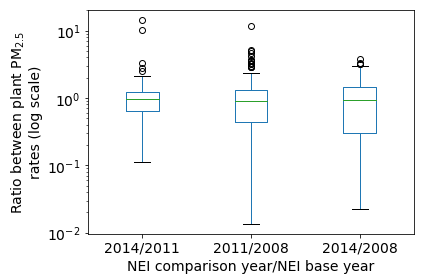

In [16]:
fig, ax = plt.subplots()
ratios.plot(kind='box', logy=True, ax=ax);
ax.set_ylabel('Ratio between plant PM$_{2.5}$\nrates (log scale)');
ax.set_xlabel('NEI comparison year/NEI base year');
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
plt.tight_layout()
fig.savefig('individual_plant_pjm_ratio.pdf', bbox_inches='tight')

In [17]:
print(ratios.describe().round(2).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  2014/2011 &  2011/2008 &  2014/2008 \\
\midrule
count &      42.00 &     142.00 &      39.00 \\
mean  &       1.59 &       1.19 &       1.13 \\
std   &       2.52 &       1.37 &       1.00 \\
min   &       0.11 &       0.01 &       0.02 \\
25\%   &       0.64 &       0.44 &       0.30 \\
50\%   &       0.97 &       0.89 &       0.95 \\
75\%   &       1.24 &       1.33 &       1.43 \\
max   &      14.30 &      11.69 &       3.79 \\
\bottomrule
\end{tabular}



### Fuel-wise rates

In [18]:
fuel2008 = pd.read_csv('fuel_pm_rates2008.csv', index_col='fuel').sort_index()
fuel2011 = pd.read_csv('fuel_pm_rates2011.csv', index_col='fuel').sort_index()
fuel2014 = pd.read_csv('fuel_pm_rates2014.csv', index_col='fuel').sort_index()

In [19]:
fuel2008

,avg_rate,num_plants
fuel,,
AVG,0.000164,789
BIOMASS,0.000279,6
COAL,0.000209,354
GAS,0.000122,408
OIL,0.000167,21


In [20]:
plant2008['pmrate'].mean()

0.00016365470585315222

In [21]:
plant2008[plant2008['fuel'] == 'COAL']['pmrate'].mean()

0.0002094530873612687

In [22]:
fuel2014['avg_rate'] / fuel2011['avg_rate']

fuel
AVG        0.611252
BIOMASS         NaN
COAL       0.684227
GAS        0.759747
OIL        0.030075
Name: avg_rate, dtype: float64

In [23]:
fuel2008['avg_rate'] / fuel2011['avg_rate']

fuel
AVG        1.101217
BIOMASS    1.181488
COAL       1.252582
GAS        1.222435
OIL        0.186646
Name: avg_rate, dtype: float64

## Plots 

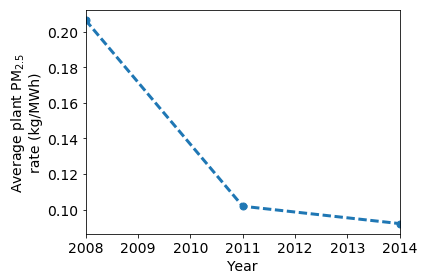

In [24]:
fig, ax = plt.subplots(figsize=(6,4));
pjm_only_rates_all = df_pjm[['pmrate2008', 'pmrate2011', 'pmrate2014']].dropna().T.set_index(
    np.array([2008, 2011, 2014])).T * METTON_PER_TON * KG_PER_METTON
pjm_only_rates = pjm_only_rates_all.mean();
pjm_only_rates.plot(ax=ax, style='o--', lw=3, markersize=7);
ax.set_ylabel('Average plant PM$_{2.5}$\nrate (kg/MWh)')
ax.set_xlabel('Year');
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
plt.tight_layout()
plt.savefig('pmrates_pjm.pdf', bbox_inches='tight')

In [25]:
fmtted = pjm_only_rates_all.mean().round(2).astype(str) + ' $\pm$ ' + pjm_only_rates_all.std().round(2).astype(str)
fmtted = fmtted.apply(lambda x: x.replace('nan $\pm$ nan', '--'))
fmtted = pd.DataFrame(fmtted)
fmtted.columns = ['PJM Average']
fmtted

,PJM Average
2008,0.21 $\pm$ 0.29
2011,0.1 $\pm$ 0.12
2014,0.09 $\pm$ 0.1


In [26]:
print(fmtted.to_latex())

\begin{tabular}{ll}
\toprule
{} &      PJM Average \\
\midrule
2008 &  0.21 \$\textbackslash pm\$ 0.29 \\
2011 &   0.1 \$\textbackslash pm\$ 0.12 \\
2014 &   0.09 \$\textbackslash pm\$ 0.1 \\
\bottomrule
\end{tabular}



In [27]:
means = {}
stds = {}
for ftype in ['BIOMASS', 'COAL', 'GAS', 'OIL']:
    means[ftype] = \
    [plant2008[plant2008['fuel'] == ftype]['pmrate'].mean(), 
     plant2011[plant2011['fuel'] == ftype]['pmrate'].mean(),
     plant2014[plant2014['fuel'] == ftype]['pmrate'].mean()]
    stds[ftype] = \
    [plant2008[plant2008['fuel'] == ftype]['pmrate'].std(), 
     plant2011[plant2011['fuel'] == ftype]['pmrate'].std(),
     plant2014[plant2014['fuel'] == ftype]['pmrate'].std()]

means['AVG'] = [plant2008['pmrate'].mean(), plant2011['pmrate'].mean(), plant2011['pmrate'].mean()]
stds['AVG'] = [plant2008['pmrate'].std(), plant2011['pmrate'].std(), plant2011['pmrate'].std()]

means = pd.DataFrame(means).set_index(np.array([2008, 2011, 2014]))
stds = pd.DataFrame(stds).set_index(np.array([2008, 2011, 2014]))

# Set units to kg
means = means * METTON_PER_TON * KG_PER_METTON
stds = stds * METTON_PER_TON * KG_PER_METTON

means.columns = means.columns.map(lambda x: 'Overall' if x in 'AVG' else x.lower().capitalize())
stds.columns = stds.columns.map(lambda x: 'Overall' if x in 'AVG' else x.lower().capitalize())

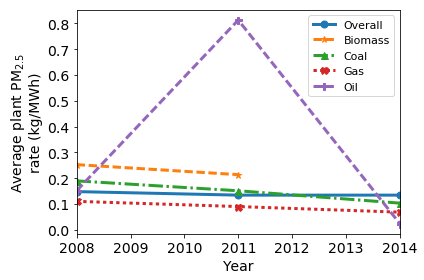

In [28]:
fig, ax = plt.subplots(figsize=(6,4))
means.plot(style=['o-','*--','^-.','X:','P--'], ax=ax, lw=3, markersize=7)
ax.set_ylabel('Average plant PM$_{2.5}$\nrate (kg/MWh)')
ax.set_xlabel('Year');
plt.legend(fontsize=11)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
plt.tight_layout()
plt.savefig('pmrates_us.pdf', bbox_inches='tight')

In [29]:
fmtted = means.round(2).astype(str) + ' $\pm$ ' + stds.round(2).astype(str)
fmtted = fmtted.applymap(lambda x: x.replace('nan $\pm$ nan', '--'))
fmtted

,Overall,Biomass,Coal,Gas,Oil
2008,0.15 $\pm$ 0.55,0.25 $\pm$ 0.36,0.19 $\pm$ 0.54,0.11 $\pm$ 0.57,0.15 $\pm$ 0.14
2011,0.13 $\pm$ 0.61,0.21 $\pm$ 0.36,0.15 $\pm$ 0.31,0.09 $\pm$ 0.53,0.81 $\pm$ 2.86
2014,0.13 $\pm$ 0.61,--,0.1 $\pm$ 0.28,0.07 $\pm$ 0.19,0.02 $\pm$ 0.03


In [30]:
print(fmtted.to_latex())

\begin{tabular}{llllll}
\toprule
{} &          Overall &          Biomass &             Coal &              Gas &              Oil \\
\midrule
2008 &  0.15 \$\textbackslash pm\$ 0.55 &  0.25 \$\textbackslash pm\$ 0.36 &  0.19 \$\textbackslash pm\$ 0.54 &  0.11 \$\textbackslash pm\$ 0.57 &  0.15 \$\textbackslash pm\$ 0.14 \\
2011 &  0.13 \$\textbackslash pm\$ 0.61 &  0.21 \$\textbackslash pm\$ 0.36 &  0.15 \$\textbackslash pm\$ 0.31 &  0.09 \$\textbackslash pm\$ 0.53 &  0.81 \$\textbackslash pm\$ 2.86 \\
2014 &  0.13 \$\textbackslash pm\$ 0.61 &               -- &   0.1 \$\textbackslash pm\$ 0.28 &  0.07 \$\textbackslash pm\$ 0.19 &  0.02 \$\textbackslash pm\$ 0.03 \\
\bottomrule
\end{tabular}

